In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("data.csv")
df.head()

,playlist,tracks,average_track_popularity,albums,artists,top_genre,average_artist_popularity,average_danceability,top_key,average_tempo,top_time_signature
0,Playlist 1,"['Oops!...I Did It Again', 'All The Small Thin...",65.66,"['Oops!... I Did It Again', 'Enema Of The Stat...","['Britney Spears', 'blink-182', 'Faith Hill', ...",'dancepop',66.17,0.65875,0,122.75544,4
1,Playlist 2,"[""It Wasn't Me"", 'Murder On The Dancefloor', '...",66.79,"['Hot Shot', 'Read My Lips', 'The Marshall Mat...","['Shaggy', 'Sophie Ellis-Bextor', 'Eminem', 'K...",'dancepop',65.65,0.67281,1,115.99193,4
2,Playlist 3,"['Dilemma', 'Without Me', 'Complicated', 'A Th...",64.64,"['Nellyville', 'The Eminem Show', 'Let Go', 'B...","['Nelly', 'Eminem', 'Avril Lavigne', 'Vanessa ...",'dancepop',69.48,0.65076,2,119.75400,4
3,Playlist 4,"['In Da Club', 'Seven Nation Army', 'Lose Your...",66.25,"[""Get Rich Or Die Tryin'"", 'Elephant', 'Curtai...","['50 Cent', 'The White Stripes', 'Eminem', 'Be...",'dancepop',68.93,0.66311,6,116.05242,4
4,Playlist 5,"['Yeah! (feat. Lil Jon & Ludacris)', 'This Lov...",67.68,"['Confessions (Expanded Edition)', 'Songs Abou...","['USHER', 'Maroon 5', 'Rascal Flatts', 'Britne...",'dancepop',69.48,0.66997,1,117.81705,4


In [4]:
X = df[['average_track_popularity', 'average_artist_popularity']]

In [5]:
model = DBSCAN(eps=3, min_samples=2).fit(X)

In [6]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,
        1,  1,  1,  2,  2, -1, -1], dtype=int64)

In [7]:
df['labels'] = model.labels_

In [14]:
df[df['labels']==1]

,playlist,tracks,average_track_popularity,albums,artists,top_genre,average_artist_popularity,average_danceability,top_key,average_tempo,top_time_signature,labels
12,Playlist 13,"['Locked out of Heaven', 'Call Me Maybe', 'We ...",72.99,"['Unorthodox Jukebox', 'Kiss (Deluxe)', 'Some ...","['Bruno Mars', 'Carly Rae Jepsen', 'fun.', 'Ri...",'pop',78.68,0.63453,0,123.29756,4,1
13,Playlist 14,"['Mirrors', 'Blurred Lines', 'Royals', 'Anothe...",72.90,"['The 20/20 Experience (Deluxe Version)', 'Blu...","['Justin Timberlake', 'Robin Thicke', 'Lorde',...",'pop',79.28,0.63060,1,117.69925,4,1
15,Playlist 16,"['Uptown Funk (feat. Bruno Mars)', 'Thinking o...",76.10,"['Uptown Special', 'x (Deluxe Edition)', 'See ...","['Mark Ronson', 'Ed Sheeran', 'Wiz Khalifa', '...",'pop',78.89,0.64909,7,121.71692,4,1
16,Playlist 17,"['Starboy', 'One Dance', 'Love Yourself', 'Clo...",75.02,"['Starboy', 'Views', 'Purpose (Deluxe)', 'Clos...","['The Weeknd', 'Drake', 'Justin Bieber', 'The ...",'pop',78.45,0.65131,7,117.18515,4,1
17,Playlist 18,"['Shape of You', ""Say You Won't Let Go"", 'Desp...",78.21,"['÷ (Deluxe)', 'Back from the Edge', 'VIDA', '...","['Ed Sheeran', 'James Arthur', 'Luis Fonsi', '...",'pop',81.23,0.69396,11,120.74486,4,1
18,Playlist 19,"['lovely (with Khalid)', 'All The Stars (with ...",75.39,"['lovely (with Khalid)', 'Black Panther The Al...","['Billie Eilish', 'Kendrick Lamar', 'Imagine D...",'pop',79.35,0.69650,1,118.86209,4,1
19,Playlist 20,"['thank u, next', 'bad guy', 'Señorita', '7 ri...",76.10,"['thank u, next', 'WHEN WE ALL FALL ASLEEP, WH...","['Ariana Grande', 'Billie Eilish', 'Shawn Mend...",'pop',81.16,0.71004,1,120.02957,4,1


In [10]:
silhouette_score(X, model.fit_predict(X))

0.4374976761593561

<AxesSubplot:xlabel='average_track_popularity', ylabel='average_artist_popularity'>

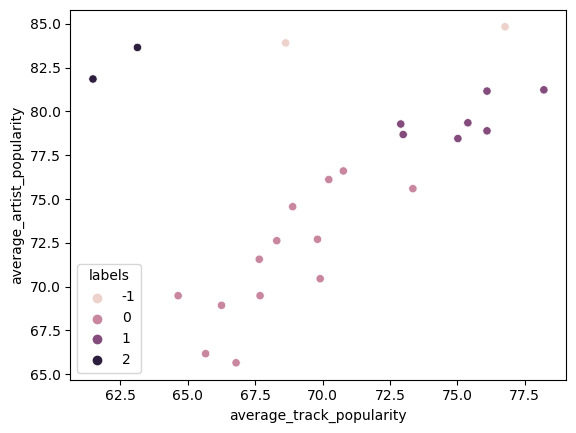

In [12]:
import seaborn as sns

sns.scatterplot(data=df, x='average_track_popularity', y='average_artist_popularity', hue='labels')